# k-Nearest-Neighbor

![img](https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg "img")


In [66]:
import math
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

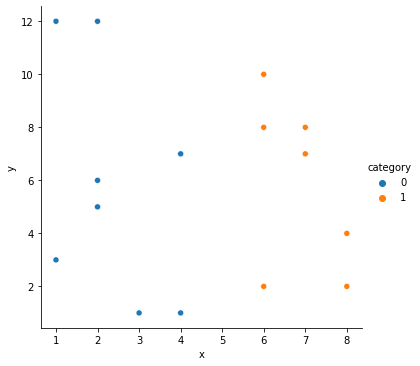

In [161]:
df = pd.DataFrame(np.array([
    [8, 2, 1], 
    [7, 8, 1],
    [7, 7, 1],
    [8, 4, 1],
    [6, 2, 1],
    [6, 10, 1],
    [6, 8, 1],
    [2, 5, 0],  
    [3, 1, 0], 
    [2, 12, 0], 
    [4, 1, 0], 
    [1, 12, 0], 
    [1, 3, 0], 
    [2, 6, 0], 
    [4, 7, 0], 
]), columns=['x', 'y', 'category'])

sns.relplot(data=df, x='x', y='y', hue="category")

# Calc Euclidean_distance
[https://en.wikipedia.org/wiki/Euclidean_distance](https://en.wikipedia.org/wiki/Euclidean_distance)

In [185]:
def calculate_distance (p1, p2):
    x1 = p1[0]
    y1 = p1[1]
    
    x2 = p2[0]
    y2 = p2[1]
    # calculate distance to p1 -> p2
    # d= √( (x2-x1)² + (y2-y1)² )
    return math.sqrt( math.pow((x2-x1), 2) + math.pow((y2-y1), 2) )


def find_k_nearest_neighbours (k, p1, points):
    neighbor_by_distance = []
    
    for idx, pN in enumerate(points): 
        distance = calculate_distance(p1, pN)
        neighbor_by_distance.append((pN, distance))

    neighbor_by_distance.sort(key=lambda x: x[1])
    
    return neighbor_by_distance[0:k]


def select_max_category_score (neighbours):
    # what category are the neighbour, count for score
    category_counts = {}
    for neighbour, distance in neighbours:
        #print(neighbour, distance)
        category = neighbour[2]
        category_counts[category] = 1 if not category_counts.get(category) else (category_counts[category] + 1)

    return sorted(category_counts.items(), reverse=True, key=lambda x: x[1])[0]
    

all_points = df.to_numpy() 
point = [10,4]


k = 7 # avoid even k => it should be odd

# 1. find k neighbours
neighbours = find_k_nearest_neighbours(k, point, all_points)

# 2. find the highest scoring category of these
predicted_category, score = select_max_category_score(neighbours)

# 3. prediction that point is of same type, because in same neighborhood
print()
print(f'>>> point: {point} is category: {category}, with score: {score}/{k} neighbour also category: {category}')
print()



>>> point: [10, 4] is category: 1, with score: 6/7 neighbour also category: 1



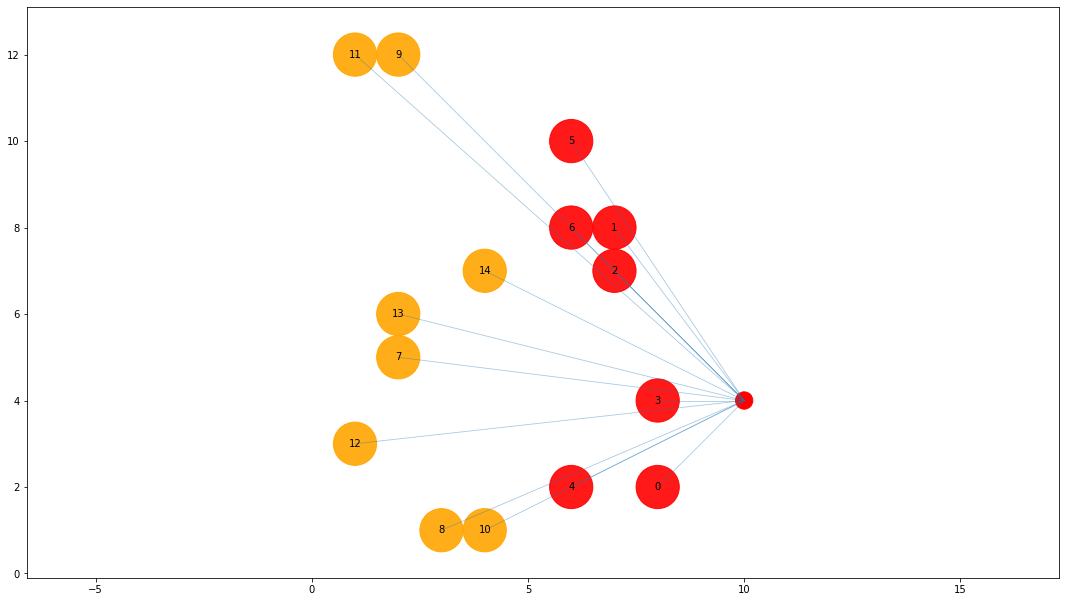

In [186]:
def category_to_color (it):
    return 'red' if it == 1 else 'orange'

# plotting 
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# draw point 
ax.add_patch(plt.Circle((point[0], point[1]), .2, color=(category_to_color(predicted_category)), alpha=1))
    
for idx, pN in enumerate(all_points): 
    # line from point to pN
    ax.add_line(plt.Line2D( [point[0], pN[0]], [point[1], pN[1]], lw=.8, alpha=0.4 ))
    
    # known points
    
    ax.add_patch(plt.Circle((pN[0], pN[1]), .5, color=(category_to_color(pN[2])), alpha=0.9))
    
    ax.annotate(f'{idx}', xy=(pN[0], pN[1]), fontsize=10,
           verticalalignment='center', horizontalalignment='center')
    
    
#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.show()